# Classifier

In [1]:
import sklearn
from sklearn import tree

In [2]:
X = [[0, 0, 0], [1,1,1], [0,1,0], [0,0,1], [1,1,0], [1,0,1]]
Y = [1, 0, 0, 0, 1, 1]

In [3]:
clf = tree.DecisionTreeClassifier()
clf.fit(X, Y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [4]:
print(clf.predict([[0, 1, 1]]))

[0]


In [5]:
import graphviz

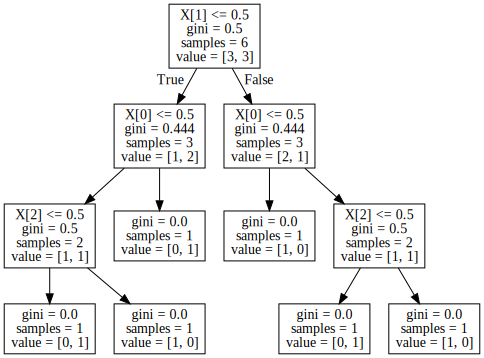

In [6]:
dot_data = tree.export_graphviz(clf, out_file=None)
graph = graphviz.Source(dot_data)
graph

In [7]:
from sklearn.datasets import load_iris
iris = load_iris()

In [8]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


In [9]:
fig = plt.figure(1, figsize=(8, 6))

x0x1 = iris.data[:, :]
print(x0.size)
ax = Axes3D(fig, elev=-150, azim=110)
plt.scatter(x0x1[:, 0], x0x1[:, 1], x0x1[:, 2], c=iris.target, cmap=plt.cm.Set1)
plt.show()

NameError: name 'x0' is not defined

<Figure size 576x432 with 0 Axes>

In [10]:
clf = tree.DecisionTreeClassifier(random_state=300, min_samples_leaf=5, class_weight={0:1, 1:1, 2:1})

# Split dataset into training and test

In [11]:
import numpy as np

In [12]:
np.random.seed(0)
indices = np.random.permutation(len(iris.data))

train = indices[:-10]
test = indices[-10:]

X_train, Y_train = iris.data[train], iris.target[train]
X_test, Y_test = iris.data[test], iris.target[test]

In [13]:
clf.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight={0: 1, 1: 1, 2: 1}, criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=300,
            splitter='best')

In [14]:
predictions = clf.predict(X_test)
predictions

array([1, 2, 1, 0, 0, 0, 2, 1, 2, 0])

In [15]:
Y_test

array([1, 1, 1, 0, 0, 0, 2, 1, 2, 0])

In [16]:
from sklearn import metrics

In [25]:
accuracy = metrics.accuracy_score(Y_test, predictions)
f1_score = metrics.f1_score(Y_test, predictions, average='micro')
recall = metrics.recall_score(Y_test, predictions, average='macro', pos_label=0)

print("Accuracy {:.3f}, F1-Score: {:.3f}".format(accuracy, f1_score))
recall

Accuracy 0.900, F1-Score: 0.900


/usr/local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1052: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


0.9166666666666666

In [27]:
from sklearn import model_selection

In [28]:
scores = model_selection.cross_val_score(clf, iris.data, iris.target, cv=5)
print(scores)

[0.96666667 1.         0.86666667 0.86666667 1.        ]


In [37]:
preds = model_selection.cross_val_predict(clf, iris.data, iris.target, cv=5)
print(preds)
print(len(preds))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1
 1 1 2 2 1 1 1 1 1 2 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 1 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
150


In [31]:
dot_data = tree.export_graphviz(clf, out_file=None)
graph = graphviz.Source(dot_data)
graph.render('iris_classifier')

'iris_classifier.pdf'

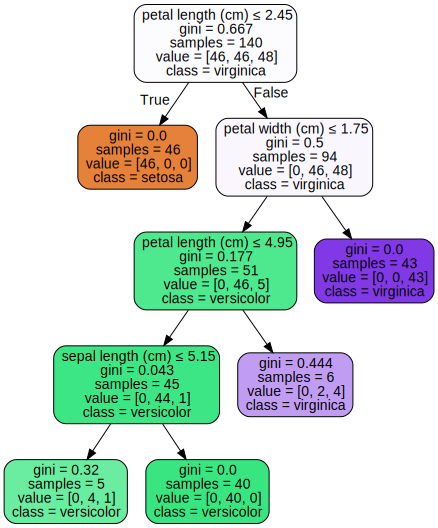

In [32]:
dot_data = tree.export_graphviz(clf, out_file=None, feature_names=iris.feature_names,
                                class_names=iris.target_names, filled=True, rounded=True,
                               special_characters=True)
graph = graphviz.Source(dot_data)
graph

In [30]:
import matplotlib.pyplot as plt
import itertools

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    #else:
        #print('Confusion matrix, without normalization')

    #print(cm)
    plt.ioff()
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' #if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

In [35]:
cm = sklearn.metrics.confusion_matrix(Y_test, preds)
plot_confusion_matrix(cm, iris.target_names)

ValueError: Found input variables with inconsistent numbers of samples: [10, 150]

In [ ]:
for i in range(len(iris.target_names)):
    roc = sklearn.metrics.roc_curve(Y_test, predictions, pos_label=0)
    plt.plot(roc[0], roc[1])
    plt.title(iris.target_names[i] + " ROC")
    plt.show()
    plt.pause(0.001)